# Statistical Insights into Cancer Genomics: Feature Selection and Clustering in TCGA-BRCA Dataset

## Objective:
The primary goal of this analysis is to identify genes that show significant differences in expression between tumor and normal samples from the TCGA-BRCA dataset. Using these differentially expressed genes, we aim to perform clustering and visualize the results in a heatmap to understand the patterns of gene expression related to cancer phenotypes.

In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('output.csv')
df2 = pd.read_csv('output2.csv')
df1

,Samples,TCGA.E9.A1NI.01A,TCGA.A1.A0SP.01A,TCGA.E2.A14T.01A,TCGA.AR.A24O.01A,TCGA.A8.A09K.01A,TCGA.OL.A5RY.01A,TCGA.BH.A0DG.01A,TCGA.B6.A0I9.01A,TCGA.E9.A1RB.01A,...,TCGA.BH.A0DT.11A,TCGA.BH.A1EV.01A,TCGA.AR.A1AY.01A,TCGA.A8.A0A7.01A,TCGA.BH.A0GY.01A,TCGA.B6.A0RN.01A,TCGA.A8.A09W.01A,TCGA.E9.A1R5.01A,TCGA.B6.A409.01A,TCGA.AR.A2LL.01A
0,TSPAN6,15.668816,18.445279,16.683041,17.100722,17.344965,18.042326,17.957463,17.710707,17.071112,...,18.700012,17.170187,18.055416,16.871405,18.446846,17.868492,17.319686,16.765845,19.398177,17.475588
1,TNMD,0.000000,10.460897,14.098200,13.612552,10.654193,14.041392,13.796357,9.996215,9.356067,...,14.815805,0.000000,11.319451,12.287840,12.172185,9.093125,11.998459,12.775790,13.850298,10.826396
2,DPM1,19.847757,19.582869,19.084218,19.249375,18.979828,19.652291,19.038561,20.249642,19.890710,...,19.180490,19.409985,20.445954,20.178515,21.533684,18.952168,19.484440,19.551358,21.670792,19.341244
3,SCYL3,16.527786,15.682843,17.451710,16.104496,17.504722,16.293014,17.167740,17.544851,16.636196,...,16.473847,17.061408,16.899840,16.584765,16.330942,17.357005,17.370908,17.532099,16.259507,17.041383
4,C1orf112,15.451178,16.037555,15.066195,15.145950,14.972850,15.232057,15.635799,16.250553,16.711859,...,14.713766,15.633821,17.661696,15.770932,15.536987,15.334997,16.732317,15.611986,16.235454,15.824424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19562,BLACAT1,7.491222,14.463777,9.146758,10.922986,0.000000,14.953694,9.982103,10.479311,9.268546,...,13.803486,8.670338,14.822472,9.073290,10.085543,0.000000,0.000000,0.000000,16.407012,6.942366
19563,0.33,11.652110,9.150917,12.428429,11.325751,10.927505,0.000000,11.664174,14.268342,10.213508,...,12.548894,12.250606,10.134205,11.239686,11.030992,11.364495,9.466259,10.547515,11.822896,11.906798
19564,0.331,0.000000,0.000000,0.000000,7.827715,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19565,0.332,9.810255,7.727225,9.302039,9.898724,11.236351,10.828697,8.916813,10.978511,10.008110,...,10.662136,0.000000,9.706672,9.812718,8.022920,8.938914,9.038987,12.533855,0.000000,9.258411


## Data Processing:
The analysis began with two datasets: one containing gene expression data (TCGA-BRCA.htseq_fpkm-uq_gene_name.tsv) and another with sample phenotypes (TCGA-BRCA.pheno.tsv). The gene expression data was transposed to align features (genes) as columns and samples as rows. Subsequently, both datasets were merged to retain only the samples present in both files, ensuring consistency for comparative analysis.

In [3]:
# Check if the string is numeric by trying to convert it to a float
def is_numeric(s):
    try:
        float(s)
        return True
    except ValueError:
        return False
# Apply the is_numeric function to the gene names column and get a boolean mask
numeric_mask = df1.iloc[:, 0].apply(is_numeric)

# Drop the rows where the gene name is numeric
df1 = df1[~numeric_mask]
df1.reset_index(drop=True)

,Samples,TCGA.E9.A1NI.01A,TCGA.A1.A0SP.01A,TCGA.E2.A14T.01A,TCGA.AR.A24O.01A,TCGA.A8.A09K.01A,TCGA.OL.A5RY.01A,TCGA.BH.A0DG.01A,TCGA.B6.A0I9.01A,TCGA.E9.A1RB.01A,...,TCGA.BH.A0DT.11A,TCGA.BH.A1EV.01A,TCGA.AR.A1AY.01A,TCGA.A8.A0A7.01A,TCGA.BH.A0GY.01A,TCGA.B6.A0RN.01A,TCGA.A8.A09W.01A,TCGA.E9.A1R5.01A,TCGA.B6.A409.01A,TCGA.AR.A2LL.01A
0,TSPAN6,15.668816,18.445279,16.683041,17.100722,17.344965,18.042326,17.957463,17.710707,17.071112,...,18.700012,17.170187,18.055416,16.871405,18.446846,17.868492,17.319686,16.765845,19.398177,17.475588
1,TNMD,0.000000,10.460897,14.098200,13.612552,10.654193,14.041392,13.796357,9.996215,9.356067,...,14.815805,0.000000,11.319451,12.287840,12.172185,9.093125,11.998459,12.775790,13.850298,10.826396
2,DPM1,19.847757,19.582869,19.084218,19.249375,18.979828,19.652291,19.038561,20.249642,19.890710,...,19.180490,19.409985,20.445954,20.178515,21.533684,18.952168,19.484440,19.551358,21.670792,19.341244
3,SCYL3,16.527786,15.682843,17.451710,16.104496,17.504722,16.293014,17.167740,17.544851,16.636196,...,16.473847,17.061408,16.899840,16.584765,16.330942,17.357005,17.370908,17.532099,16.259507,17.041383
4,C1orf112,15.451178,16.037555,15.066195,15.145950,14.972850,15.232057,15.635799,16.250553,16.711859,...,14.713766,15.633821,17.661696,15.770932,15.536987,15.334997,16.732317,15.611986,16.235454,15.824424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19229,PAGR1,17.842995,16.884865,17.741512,15.694045,18.283938,16.971927,16.192755,15.976430,17.256696,...,16.114984,17.437778,17.238725,16.836750,17.722886,17.852667,16.758053,17.105813,18.212257,18.221169
19230,RPS4Y2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19231,TMEM272,9.820748,9.096113,7.098429,10.364490,8.705397,9.617852,11.831615,0.000000,8.313934,...,10.450388,9.933849,6.508984,10.600154,11.935126,9.895523,8.413553,7.330713,7.383941,6.475507
19232,BLACAT1,7.491222,14.463777,9.146758,10.922986,0.000000,14.953694,9.982103,10.479311,9.268546,...,13.803486,8.670338,14.822472,9.073290,10.085543,0.000000,0.000000,0.000000,16.407012,6.942366


In [4]:
a = dict(df1)
df = pd.DataFrame(a)
index_ = list(df1['Samples'])
df.index = index_
df = df.T
df = df.drop(df.index[0])
df.reset_index(inplace=True)
df = df.rename(columns={'index': 'Samples'})
df

,Samples,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,OR12D2,PRAMEF26,OR8K3,CCDC163,LINC02203,PAGR1,RPS4Y2,TMEM272,BLACAT1,GIMAP1-GIMAP5
0,TCGA.E9.A1NI.01A,15.668816,0.0,19.847757,16.527786,15.451178,14.941129,16.83133,19.526689,16.89174,...,0.0,0.0,0.0,14.521081,0.0,17.842995,0.0,9.820748,7.491222,0.0
1,TCGA.A1.A0SP.01A,18.445279,10.460897,19.582869,15.682843,16.037555,16.620256,15.333753,19.916207,16.341906,...,0.0,0.0,0.0,13.893383,0.0,16.884865,0.0,9.096113,14.463777,0.0
2,TCGA.E2.A14T.01A,16.683041,14.0982,19.084218,17.45171,15.066195,17.213556,15.892686,18.572773,16.720162,...,0.0,0.0,0.0,14.877943,0.0,17.741512,0.0,7.098429,9.146758,0.0
3,TCGA.AR.A24O.01A,17.100722,13.612552,19.249375,16.104496,15.14595,15.289178,18.306263,18.543298,16.837037,...,0.0,0.0,0.0,15.041261,6.820863,15.694045,0.0,10.36449,10.922986,0.0
4,TCGA.A8.A09K.01A,17.344965,10.654193,18.979828,17.504722,14.97285,15.182838,16.089251,17.876285,16.425787,...,0.0,0.0,0.0,15.819798,10.317642,18.283938,0.0,8.705397,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,TCGA.B6.A0RN.01A,17.868492,9.093125,18.952168,17.357005,15.334997,14.219424,16.752344,18.381867,16.323012,...,0.0,0.0,0.0,13.17258,0.0,17.852667,0.0,9.895523,0.0,0.0
1213,TCGA.A8.A09W.01A,17.319686,11.998459,19.48444,17.370908,16.732317,15.338637,17.56658,19.882582,16.904526,...,0.0,0.0,0.0,15.215651,0.0,16.758053,0.0,8.413553,0.0,0.0
1214,TCGA.E9.A1R5.01A,16.765845,12.77579,19.551358,17.532099,15.611986,14.660789,17.263662,18.568886,18.040743,...,0.0,0.0,0.0,15.031067,0.0,17.105813,0.0,7.330713,0.0,0.0
1215,TCGA.B6.A409.01A,19.398177,13.850298,21.670792,16.259507,16.235454,14.903649,15.612304,19.553328,16.556427,...,0.0,0.0,0.0,16.004578,0.0,18.212257,0.0,7.383941,16.407012,0.0


In [5]:
df2

,Samples,type,tissue_source_site,disease_type
0,TCGA.A2.A0CY.01A,Tumor,B6,Ductal and Lobular Neoplasms
1,TCGA.AO.A0J8.01A,Tumor,A8,Ductal and Lobular Neoplasms
2,TCGA.E2.A14N.01A,Tumor,BH,Ductal and Lobular Neoplasms
3,TCGA.BH.A1F0.11B,Tumor,BH,Ductal and Lobular Neoplasms
4,TCGA.BH.A0BZ.11A,Tumor,AC,Ductal and Lobular Neoplasms
...,...,...,...,...
608,TCGA.EW.A424.01A,Tumor,EW,Ductal and Lobular Neoplasms
609,TCGA.A8.A07L.01A,Tumor,AO,Ductal and Lobular Neoplasms
610,TCGA.BH.A0HI.01A,Tumor,A1,Ductal and Lobular Neoplasms
611,TCGA.PE.A5DD.01A,Tumor,E2,Ductal and Lobular Neoplasms


In [6]:
df = df.dropna()
df

,Samples,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,OR12D2,PRAMEF26,OR8K3,CCDC163,LINC02203,PAGR1,RPS4Y2,TMEM272,BLACAT1,GIMAP1-GIMAP5
0,TCGA.E9.A1NI.01A,15.668816,0.0,19.847757,16.527786,15.451178,14.941129,16.83133,19.526689,16.89174,...,0.0,0.0,0.0,14.521081,0.0,17.842995,0.0,9.820748,7.491222,0.0
1,TCGA.A1.A0SP.01A,18.445279,10.460897,19.582869,15.682843,16.037555,16.620256,15.333753,19.916207,16.341906,...,0.0,0.0,0.0,13.893383,0.0,16.884865,0.0,9.096113,14.463777,0.0
2,TCGA.E2.A14T.01A,16.683041,14.0982,19.084218,17.45171,15.066195,17.213556,15.892686,18.572773,16.720162,...,0.0,0.0,0.0,14.877943,0.0,17.741512,0.0,7.098429,9.146758,0.0
3,TCGA.AR.A24O.01A,17.100722,13.612552,19.249375,16.104496,15.14595,15.289178,18.306263,18.543298,16.837037,...,0.0,0.0,0.0,15.041261,6.820863,15.694045,0.0,10.36449,10.922986,0.0
4,TCGA.A8.A09K.01A,17.344965,10.654193,18.979828,17.504722,14.97285,15.182838,16.089251,17.876285,16.425787,...,0.0,0.0,0.0,15.819798,10.317642,18.283938,0.0,8.705397,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,TCGA.B6.A0RN.01A,17.868492,9.093125,18.952168,17.357005,15.334997,14.219424,16.752344,18.381867,16.323012,...,0.0,0.0,0.0,13.17258,0.0,17.852667,0.0,9.895523,0.0,0.0
1213,TCGA.A8.A09W.01A,17.319686,11.998459,19.48444,17.370908,16.732317,15.338637,17.56658,19.882582,16.904526,...,0.0,0.0,0.0,15.215651,0.0,16.758053,0.0,8.413553,0.0,0.0
1214,TCGA.E9.A1R5.01A,16.765845,12.77579,19.551358,17.532099,15.611986,14.660789,17.263662,18.568886,18.040743,...,0.0,0.0,0.0,15.031067,0.0,17.105813,0.0,7.330713,0.0,0.0
1215,TCGA.B6.A409.01A,19.398177,13.850298,21.670792,16.259507,16.235454,14.903649,15.612304,19.553328,16.556427,...,0.0,0.0,0.0,16.004578,0.0,18.212257,0.0,7.383941,16.407012,0.0


In [7]:
merged_df = df2.merge(df,on='Samples')
merged_df

,Samples,type,tissue_source_site,disease_type,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,...,OR12D2,PRAMEF26,OR8K3,CCDC163,LINC02203,PAGR1,RPS4Y2,TMEM272,BLACAT1,GIMAP1-GIMAP5
0,TCGA.A2.A0CY.01A,Tumor,B6,Ductal and Lobular Neoplasms,18.782026,0.0,19.361319,16.684798,15.555366,14.37104,...,0.0,0.0,0.0,13.802419,0.0,17.641597,0.0,10.0899,14.861179,0.0
1,TCGA.AO.A0J8.01A,Tumor,A8,Ductal and Lobular Neoplasms,17.768535,12.386137,18.824546,17.331973,15.808005,16.250155,...,0.0,0.0,0.0,15.262439,0.0,17.222762,0.0,8.785703,0.0,0.0
2,TCGA.E2.A14N.01A,Tumor,BH,Ductal and Lobular Neoplasms,18.155222,11.70931,19.917749,16.025397,16.613364,15.698358,...,9.778523,0.0,0.0,16.234979,0.0,15.180543,0.0,10.343592,15.958083,0.0
3,TCGA.BH.A1F0.11B,Tumor,BH,Ductal and Lobular Neoplasms,18.861721,17.337847,19.361469,16.248498,14.380057,15.605566,...,0.0,0.0,0.0,14.976882,6.665501,15.745488,0.0,8.532398,13.137545,7.093035
4,TCGA.BH.A0BZ.11A,Tumor,AC,Ductal and Lobular Neoplasms,18.580214,19.85305,18.94016,16.292713,14.234045,16.635651,...,0.0,0.0,0.0,15.393139,0.0,14.868113,0.0,7.47105,10.257388,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,TCGA.EW.A424.01A,Tumor,EW,Ductal and Lobular Neoplasms,17.972779,11.579762,19.408273,16.702496,15.475973,15.13655,...,0.0,0.0,0.0,14.172564,0.0,18.39475,0.0,10.394537,13.152584,0.0
584,TCGA.A8.A07L.01A,Tumor,AO,Ductal and Lobular Neoplasms,17.265731,0.0,20.09799,16.85819,16.862459,13.723452,...,0.0,0.0,0.0,14.584834,0.0,17.872061,0.0,9.627007,0.0,0.0
585,TCGA.BH.A0HI.01A,Tumor,A1,Ductal and Lobular Neoplasms,16.897974,9.885735,19.237956,16.987303,14.886096,15.526247,...,0.0,0.0,0.0,15.374991,0.0,17.608177,0.0,9.519778,8.577939,0.0
586,TCGA.PE.A5DD.01A,Tumor,E2,Ductal and Lobular Neoplasms,17.233321,12.968377,18.957937,16.912248,15.963849,16.121715,...,0.0,0.0,0.0,14.071948,0.0,17.978886,0.0,11.71326,0.0,0.0


## Feature Selection:
A two-sample t-test was employed to assess the association between each gene's expression and the sample type (Tumor or Normal). Genes were ranked based on their p-values, and the top 50 genes with the lowest p-values were selected as they represent features with significant differences in expression between the two groups.

## Clustering:
Hierarchical clustering was performed using the Ward method, which seeks to minimize the variance within clusters. The top 50 differentially expressed genes served as the basis for clustering. This approach allowed us to observe the natural grouping of samples based on the expression profiles of these genes.

## Heatmap Visualization:
A heatmap was generated to visualize the expression patterns of the selected genes across samples. The rows of the heatmap correspond to genes, while the columns represent samples. The color scale reflects the level of gene expression, with red indicating high expression and blue indicating low expression. The dendrograms accompanying the heatmap illustrate the relationships between samples and genes based on their expression patterns.

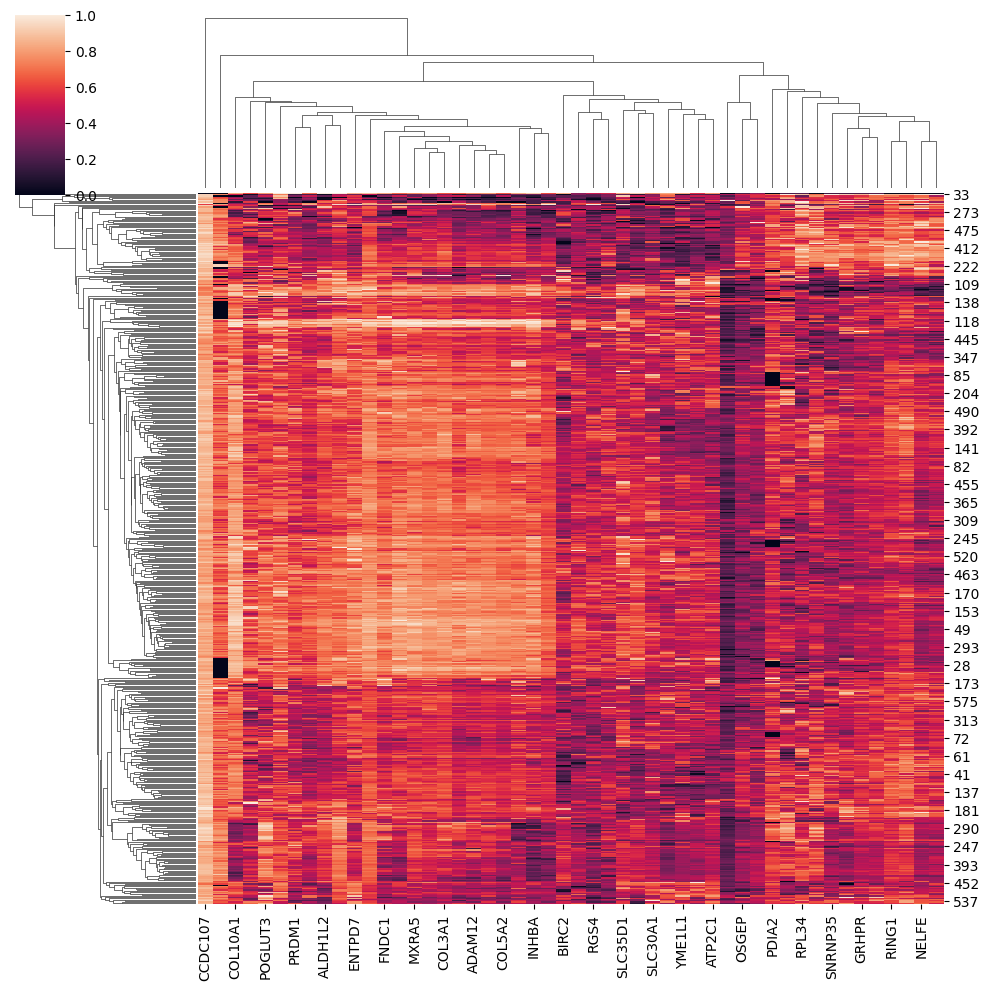

In [8]:
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import warnings

warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter('ignore', RuntimeWarning)
# Convert all gene expression columns to numeric, coercing errors to NaN
for col in merged_df.columns[4:]:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# Now split your data into tumor and normal samples
tumor_samples = merged_df[merged_df['type'] == 'Tumor']
normal_samples = merged_df[merged_df['type'] == 'Normal']

# Initialize a list to store p-values
p_values = []

# Perform t-tests for each gene
genes = merged_df.columns[4:]  # Adjust this if your gene columns start from a different index
for gene in genes:
    t_stat, p_val = ttest_ind(tumor_samples[gene], normal_samples[gene], nan_policy='omit')
    p_values.append(p_val)

# Create a DataFrame of genes and their associated p-values
gene_p_values = pd.DataFrame({'Gene': genes, 'p_value': p_values})

# Sort the genes by p-value and select the top 50
top_genes = gene_p_values.sort_values('p_value').head(50)['Gene']

# Subset the merged DataFrame to only include the top 50 genes
top_gene_data = merged_df[top_genes]

# Perform hierarchical clustering
clusters = linkage(top_gene_data.transpose(), method='ward')

# Create a heatmap with the clustered data
sns.clustermap(top_gene_data, row_cluster=True, col_cluster=True, standard_scale=1)

# Display the heatmap
plt.show()

## Results:
The heatmap provided a clear visualization of the gene expression profiles, highlighting distinct clusters of tumor and normal samples. This suggests that the selected genes are strongly associated with the phenotypic differences between the two groups. Notably, some genes exhibited consistent high or low expression within tumor samples, underscoring their potential role in cancer biology.

## Conclusion:
The t-test based feature selection method effectively identified genes that differentiate between tumor and normal tissue types. The clustering and heatmap visualization elucidated the expression patterns across samples, potentially offering insights into the molecular mechanisms of breast cancer. These findings could serve as a foundation for further biological validation and research into targeted cancer therapies.